In [25]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore

from sklearn.metrics import ( # type: ignore # type: ignore
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
)
from sklearn.inspection import DecisionBoundaryDisplay # type: ignore
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore
from sklearn.model_selection import train_test_split, GridSearchCV # type: ignore
from sklearn.svm import LinearSVC, SVC # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

In [26]:
import warnings

warnings.filterwarnings("ignore")

In [27]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
y = digits.target
data = digits.images


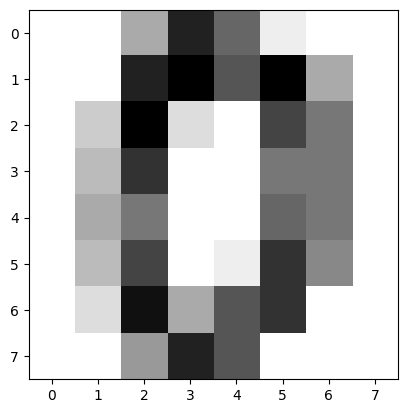

In [28]:
plt.imshow(data[0], cmap=plt.cm.gray_r)

In [29]:
y[0]

0

In [30]:
data[0].reshape(-1)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [31]:
n_samples = len(data)
data = data.reshape([n_samples, -1])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

svm_model = SVC(kernel='linear', decision_function_shape="ovo")
svm_model.fit(X_train, y_train)


SVC(decision_function_shape='ovo', kernel='linear')

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

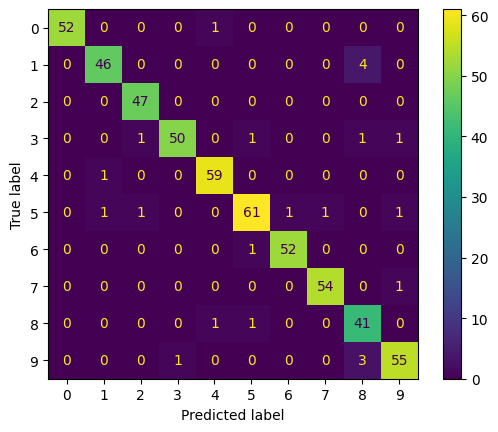

In [34]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
)

In [35]:
accuracy_score(y_test, y_pred)

0.9574074074074074

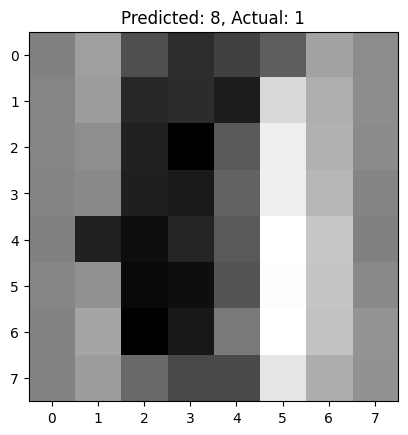

In [43]:
for i in range(0, len(y_pred)):
    # 1 Napiš podmínku, která porovná predikovanou hodnotu pro i-tý obrázek a skutečnou hodnotu pro i-tý obrázek
    if y_pred[i] != y_test[i]:
        image = X_test[i]  # 2 sem dej načtení i-tého obrázku z proměnné X_test
        # Obrázek převedeme zpět na matici 8x8
        image = image.reshape(8, 8)
        # Příkaz na zobrazení obrázku
        plt.imshow(image, cmap=plt.cm.gray_r)
        # Grafu dáme titulek, který porovnává predikovanou a skutečnou hodnotu
        plt.title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')
        # Obrázek uložíme do souboru
        plt.savefig(f"{i}.png")
    # Přidáme podmínku, která zastaví běh po pěti obrazcích
    
    